# Results of TSD, DANN, SCADANN models across 10 days of inward rotation starting at Day_0~2 for Subject_4

Library used can be downloaded from https://github.com/aonai/long_term_EMG_myo   
&emsp; Original by UlysseCoteAllard https://github.com/UlysseCoteAllard/LongTermEMG   
Dataset recorded by https://github.com/Suguru55/Wearable_Sensor_Long-term_sEMG_Dataset   
Extended robot project can be found in https://github.com/aonai/myo_robot_arm

### Notes
* weights for TSD are total of 50 training models, 10 for each day
* weights for DANN and SCADANN are total of 45 trianing models, 9 for each day


* training examples should have shape (1, 8,)
* first session has shape (12, 572, 252)
* the following sessions have shape (4, 572, 252)
* training labels should have shape (1, 8,)


* location 0, 1, and 2 corresponds to neutral position, inward rotation, and outward rotation respectively
* session mentioned below are days, so number of sessions is 10



In [1]:
import os, sys
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import torch
import pandas as pd 

In [2]:
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
os.chdir(code_dir)
from PrepareAndLoadData.process_data import read_data_training

# 0. Prepare Data
use `switch=2` to train across days and individually on wearing location 0 (`session_in_include=[0]`)

### specify the directories used for running the code:
* `code_diar`: path to long_term_EMG_myo library
* `data_dir`: where raw dataset is loaded; raw data is in csv format
* `processed_data_dir`: where processed dataset is loaded; processed data is in npy pickle format
    * processed data should be a ndarray of shape   
    (controlling_factor_1 x controlling_factor_2 x num_sessions_per_gesture x #examples_window*#mov(26*22=572) x processed_channel_shape(252 for TSD, (4,8,10) for ConvNet)
* `path_<model_name>`: where model weights are saved
    * weights should be saved in folder `/Weights/<model_name>`. Each folder has subfolders containing weights for the first controlling factor.
    * weights for base model (TSD or ConvNet) contain m set of training model
    * weights for DANN and SCADANN contain m-1 set of trianing model (these models are trianed based on TSD, so they do not have a best_state_0.pt model). 
* `save_<model_name>`: where model results are saved
    * each result for testing a model on a group of dataset is saved in folder `results`. Each result has corresponding 
        * `<model_name>.txt` includes predictions, ground truths, array of accuracies for each participant and each session, and overall accuracy
        * `predictions_<model_name>.npy` includes array of accuracies, ground truths, predictions, and model outputs (probability array for each prediction)
        * remember to make blank files in these names before saving



* use `read_data_training` to process raw dataset
        

In [3]:
data_dir = "/home/laiy/gitrepos/msr_final/Wearable_Sensor_Long-term_sEMG_Dataset/data"
processed_data_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Processed_datasets_all_across_day_loc_1_lump3"
code_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo"
save_dir = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Results"

path_TSD ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump3/TSD"
save_TSD = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_DANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump3/DANN"
save_DANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

path_SCADANN ="/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump3/SCADANN"
save_SCADANN = "/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/results"

In [4]:
# read_data_training(path=data_dir, store_path = processed_data_dir,  
#                    sessions_to_include =[1], switch=2, include_in_first=3,
#                    start_at_participant=5, num_participant=1)

Loading and preparing Training datasets...
session  1  --- process data in days  [2, 5, 6, 16, 17, 18, 22, 24, 25, 28]
index_participant_list  [5]
READ  Sub 5 _Loc 1 _Day 2
examples_per_session =  (1, 4, 572, 252)
READ  Sub 5 _Loc 1 _Day 5
Include day  5  in first dataset  (4, 572, 252)
examples of first session =  (8, 572, 252)
examples_per_session =  (1, 8, 572, 252)
READ  Sub 5 _Loc 1 _Day 6
Include day  6  in first dataset  (8, 572, 252)
examples of first session =  (12, 572, 252)
examples_per_session =  (1, 12, 572, 252)
READ  Sub 5 _Loc 1 _Day 16


/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


examples_per_session =  (2,)
READ  Sub 5 _Loc 1 _Day 17
examples_per_session =  (3,)
READ  Sub 5 _Loc 1 _Day 18
examples_per_session =  (4,)
READ  Sub 5 _Loc 1 _Day 22
examples_per_session =  (5,)
READ  Sub 5 _Loc 1 _Day 24
examples_per_session =  (6,)
READ  Sub 5 _Loc 1 _Day 25
examples_per_session =  (7,)
READ  Sub 5 _Loc 1 _Day 28
examples_per_session =  (8,)
@ traning sessions =  (1, 8)
traning examples  (1, 8)
traning labels  (1, 8)
all traning examples  (1, 8)
all traning labels  (1, 8)


In [5]:
# check stored pickle 
with open(processed_data_dir + "/training_session.pickle", 'rb') as f:
    dataset_training = pickle.load(file=f)

examples_datasets_train = dataset_training['examples_training']
print('traning examples ', np.shape(examples_datasets_train))
labels_datasets_train = dataset_training['labels_training']
print('traning labels ', np.shape(labels_datasets_train))

traning examples  (1, 8)
traning labels  (1, 8)


In [6]:
for idx, examples_per_session in enumerate (examples_datasets_train[0]):
    print(idx, " examples_per_session = ", np.shape(examples_per_session))
    print(idx, " labels_per_session = ", np.shape(labels_datasets_train[0][idx]))

0  examples_per_session =  (12, 572, 252)
0  labels_per_session =  (12, 572)
1  examples_per_session =  (4, 572, 252)
1  labels_per_session =  (4, 572)
2  examples_per_session =  (4, 572, 252)
2  labels_per_session =  (4, 572)
3  examples_per_session =  (4, 572, 252)
3  labels_per_session =  (4, 572)
4  examples_per_session =  (4, 572, 252)
4  labels_per_session =  (4, 572)
5  examples_per_session =  (4, 572, 252)
5  labels_per_session =  (4, 572)
6  examples_per_session =  (4, 572, 252)
6  labels_per_session =  (4, 572)
7  examples_per_session =  (4, 572, 252)
7  labels_per_session =  (4, 572)


### Specify params used for training and testing

During training and testing, processed datasets are first put into pytorch dataloders, then feed to the model trainer; following are params for TSD model and dataloaders

* `num_kernels`: list of integers defining number of neurons used in each linear layer (linear block has `dropout`=0.5)
* `number_of_cycles_total`: number of trails performed for each session (assuming that all session have the same trail size)
    * 4 for myo across day training
* `number_of_classes`: total number of gestures performed in dataset
    * 22 for myo
* `batch_size`: number of examples stored in each batch
* `feature_vector_input_length`: length of input array or each processed signal; i.e. size of one training example 
    * 252 for TSD
* `learning_rate`= 0.002515
    

In [7]:
num_kernels=[200, 200, 200]                                
number_of_cycle_for_first_training = np.shape(examples_datasets_train[0][0])[0]               
number_of_cycles_total=np.shape(examples_datasets_train[-1][-1])[0]               
print("number_of_cycle_for_first_training ", number_of_cycle_for_first_training)
print("number_of_cycles_total ", number_of_cycles_total)
number_of_classes=22
batch_size=128          
feature_vector_input_length=252                     
learning_rate=0.002515

number_of_cycle_for_first_training  12
number_of_cycles_total  4


# 1. TSD_DNN
* `train_fine_tuning`: used to train data using a base model (TSD or ConvNet)
    * running this function will save num_sessions sets of TSD model weights (each is fine tuned based on the previous training)  
    
* `test_standard_model_on_training_sessions`: test model result


### check if dataloaders are loaded correctly:
* each participant has shape (num_session x 40 x 572 x 252)
* each session has shape (40 x 572 x 252)
* put these data into on group ends up with shape (40*572=22880, 252)
    * shuffle on group of data and put into dataloaders
    * each participant should have num_sessions sets of dataloaders, each correspond to one session
   

In [8]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_standard import \
            test_standard_model_on_training_sessions, train_fine_tuning

In [9]:
# train_fine_tuning(examples_datasets_train, labels_datasets_train,
#                   num_kernels=num_kernels, path_weight_to_save_to=path_TSD,
#                   number_of_classes=number_of_classes, 
#                   number_of_cycles_total=number_of_cycles_total,
#                   number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                   batch_size=batch_size,
#                   feature_vector_input_length=feature_vector_input_length,
#                   learning_rate=learning_rate)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (0,)    (0,)
       one group XY train (6177, 252)    (6177,)
       one group XY valid (687, 252)    (687, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   G

train Loss: 0.00111745 Acc: 0.94921875
val Loss: 0.00027095 Acc: 0.98253275
New best validation loss: 0.0002709508723046582
Epoch 22 of 500 took 0.111s
Epoch 22/499
----------
train Loss: 0.00102116 Acc: 0.95507812
val Loss: 0.00042572 Acc: 0.9650655
Epoch 23 of 500 took 0.107s
Epoch 23/499
----------
train Loss: 0.00102178 Acc: 0.95361328
val Loss: 0.00036273 Acc: 0.9650655
Epoch 24 of 500 took 0.110s
Epoch 24/499
----------
train Loss: 0.00091240 Acc: 0.96191406
val Loss: 0.00020530 Acc: 0.97816594
Epoch 25 of 500 took 0.108s
Epoch 25/499
----------
train Loss: 0.00082657 Acc: 0.96289062
val Loss: 0.00036425 Acc: 0.97816594
Epoch 26 of 500 took 0.114s
Epoch 26/499
----------
train Loss: 0.00104386 Acc: 0.95214844
val Loss: 0.00031966 Acc: 0.97816594
Epoch 27 of 500 took 0.112s
Epoch 27/499
----------
train Loss: 0.00084264 Acc: 0.9609375
val Loss: 0.00036473 Acc: 0.96943231
Epoch 28 of 500 took 0.116s
Epoch 28/499
----------
train Loss: 0.00105088 Acc: 0.95166016
val Loss: 0.00041956

train Loss: 0.00154325 Acc: 0.92822266
val Loss: 0.00071722 Acc: 0.95196507
Epoch 6 of 500 took 0.109s
Epoch 6/499
----------
train Loss: 0.00164340 Acc: 0.91552734
val Loss: 0.00058534 Acc: 0.95633188
Epoch 7 of 500 took 0.106s
Epoch 7/499
----------
train Loss: 0.00150723 Acc: 0.92919922
val Loss: 0.00073290 Acc: 0.94759825
Epoch 8 of 500 took 0.111s
Epoch 8/499
----------
train Loss: 0.00150643 Acc: 0.92724609
val Loss: 0.00062049 Acc: 0.94323144
Epoch 9 of 500 took 0.106s
Epoch 9/499
----------
train Loss: 0.00168774 Acc: 0.91699219
val Loss: 0.00062642 Acc: 0.97379913
Epoch 10 of 500 took 0.109s
Epoch 10/499
----------
train Loss: 0.00135631 Acc: 0.93847656
val Loss: 0.00056192 Acc: 0.95196507
Epoch 11 of 500 took 0.134s
Epoch 11/499
----------
train Loss: 0.00126406 Acc: 0.95068359
val Loss: 0.00040191 Acc: 0.9650655
New best validation loss: 0.00040190764519845555
Epoch 12 of 500 took 0.130s
Epoch 12/499
----------
train Loss: 0.00143555 Acc: 0.93603516
val Loss: 0.00046471 Acc:

train Loss: 0.00164227 Acc: 0.92089844
val Loss: 0.00065055 Acc: 0.96069869
New best validation loss: 0.0006505461108736596
Epoch 13 of 500 took 0.111s
Epoch 13/499
----------
train Loss: 0.00156398 Acc: 0.92822266
val Loss: 0.00076496 Acc: 0.930131
Epoch 14 of 500 took 0.107s
Epoch 14/499
----------
train Loss: 0.00166080 Acc: 0.92529297
val Loss: 0.00086471 Acc: 0.93449782
Epoch 15 of 500 took 0.111s
Epoch 15/499
----------
train Loss: 0.00154996 Acc: 0.93359375
val Loss: 0.00053184 Acc: 0.95196507
New best validation loss: 0.0005318422244625841
Epoch 16 of 500 took 0.108s
Epoch 16/499
----------
train Loss: 0.00151405 Acc: 0.93164062
val Loss: 0.00068292 Acc: 0.94759825
Epoch 17 of 500 took 0.109s
Epoch 17/499
----------
train Loss: 0.00152001 Acc: 0.92919922
val Loss: 0.00075208 Acc: 0.92139738
Epoch 18 of 500 took 0.106s
Epoch 18/499
----------
train Loss: 0.00139514 Acc: 0.93554688
val Loss: 0.00040050 Acc: 0.97816594
New best validation loss: 0.0004004968175721481
Epoch 19 of 50

train Loss: 0.00187480 Acc: 0.91650391
val Loss: 0.00084520 Acc: 0.92139738
Epoch 7 of 500 took 0.118s
Epoch 7/499
----------
train Loss: 0.00175920 Acc: 0.91455078
val Loss: 0.00086803 Acc: 0.93886463
Epoch 8 of 500 took 0.113s
Epoch 8/499
----------
train Loss: 0.00171825 Acc: 0.91650391
val Loss: 0.00084143 Acc: 0.90829694
Epoch 9 of 500 took 0.131s
Epoch 9/499
----------
train Loss: 0.00152375 Acc: 0.92578125
val Loss: 0.00062306 Acc: 0.94759825
Epoch 10 of 500 took 0.142s
Epoch 10/499
----------
train Loss: 0.00158520 Acc: 0.92480469
val Loss: 0.00061745 Acc: 0.95196507
Epoch 11 of 500 took 0.117s
Epoch 11/499
----------
train Loss: 0.00144008 Acc: 0.93554688
val Loss: 0.00068516 Acc: 0.93886463
Epoch    12: reducing learning rate of group 0 to 5.0300e-04.
Epoch 12 of 500 took 0.110s
Epoch 12/499
----------
train Loss: 0.00136370 Acc: 0.93408203
val Loss: 0.00060438 Acc: 0.93449782
Epoch 13 of 500 took 0.111s
Epoch 13/499
----------
train Loss: 0.00127513 Acc: 0.93701172
val Loss:

In [10]:
algo_name = "standard_TSD"
test_standard_model_on_training_sessions(examples_datasets_train, labels_datasets_train,
                                  num_neurons=num_kernels, use_only_first_training=True,
                                  path_weights=path_TSD,
                                  feature_vector_input_length=feature_vector_input_length,
                                  save_path = save_TSD, algo_name=algo_name,
                                  number_of_cycles_total=number_of_cycles_total,
                                  number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                                  number_of_classes=number_of_classes, cycle_for_test=3)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (1716, 252)    (1716, 252)
       one group XY train (6177, 252)    (6177,)
       one group XY valid (687, 252)    (687, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [11]:
results_filename = save_TSD + '/predictions_' + algo_name + "_no_retraining.npy"
results = np.load(results_filename, allow_pickle=True)
TSD_acc = results[0]
TSD_acc_overall = np.mean(TSD_acc)
index_participant_list = ['0~2', 3, 4, 5, 6, 7, 8, 9]
TSD_df = pd.DataFrame(TSD_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
TSD_df

,Participant_5
Day_0~2,0.916084
Day_3,0.690559
Day_4,0.716783
Day_5,0.568182
Day_6,0.618881
Day_7,0.444056
Day_8,0.458042
Day_9,0.41958


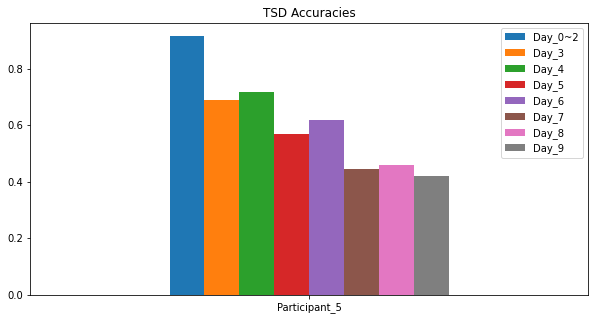

In [12]:
TSD_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("TSD Accuracies")
plt.show()

In [13]:
from TrainingsAndEvaluations.ForTrainingSessions.utils import get_gesture_accuracies

In [14]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
m_name = "Loc1_Sub"
n_name = "Day0~2->"
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_TSD+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 8)
predictions =  (1, 8)
index_participant_list  ['0~2', 3, 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 8)


,Unnamed: 0,Loc1_Sub5_Day0~2->0~2,Loc1_Sub5_Day0~2->3,Loc1_Sub5_Day0~2->4,Loc1_Sub5_Day0~2->5,Loc1_Sub5_Day0~2->6,Loc1_Sub5_Day0~2->7,Loc1_Sub5_Day0~2->8,Loc1_Sub5_Day0~2->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,0.692308,0.884615,0.961538,0.500000,0.269231,0.423077,0.384615
2,M2,0.871795,0.500000,0.769231,0.384615,0.346154,0.000000,0.269231,0.346154
3,M3,0.948718,0.076923,0.230769,0.038462,0.000000,0.000000,0.000000,0.000000
4,M4,0.833333,0.000000,0.730769,0.000000,0.000000,0.000000,0.000000,0.000000
5,M5,1.000000,1.000000,0.538462,0.538462,0.884615,0.000000,0.461538,0.038462
6,M6,1.000000,0.230769,1.000000,0.538462,0.346154,0.192308,0.115385,0.769231
7,M7,0.987179,0.961538,0.923077,0.884615,1.000000,0.846154,0.692308,0.769231
8,M8,0.923077,1.000000,0.961538,1.000000,0.923077,0.961538,0.807692,0.384615
9,M9,0.897436,0.807692,0.846154,0.615385,1.000000,0.807692,0.769231,0.615385


# 2. DANN
* `train_DANN`: train DANN model using the first set of training weights from base model
    * num_sessions-1 sets of training weights will be saved
* `test_DANN_on_training_sessions`: test DANN model

In [15]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_DA import train_DANN, test_DANN_on_training_sessions

In [16]:
# train_DANN(examples_datasets_train, labels_datasets_train, 
#           num_kernels=num_kernels,
#           path_weights_fine_tuning=path_TSD,
#           number_of_classes=number_of_classes,
#           number_of_cycles_total = number_of_cycles_total,
#           number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#           batch_size=batch_size,
#           feature_vector_input_length=feature_vector_input_length,
#           path_weights_to_save_to=path_DANN, learning_rate=learning_rate)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (0,)    (0,)
       one group XY train (6177, 252)    (6177,)
       one group XY valid (687, 252)    (687, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   G

Accuracy source 0.909180, main loss classifier 0.186234, source classification loss 0.236088, loss domain distinction 0.184229, accuracy domain distinction 0.500000
VALIDATION Loss: 0.20573461 Acc: 0.92430859
Epoch 24 of 500 took 0.240s
Accuracy source 0.920410, main loss classifier 0.182453, source classification loss 0.229586, loss domain distinction 0.182879, accuracy domain distinction 0.500000
VALIDATION Loss: 0.20957269 Acc: 0.91994178
Epoch 25 of 500 took 0.237s
Accuracy source 0.918945, main loss classifier 0.184206, source classification loss 0.232206, loss domain distinction 0.183857, accuracy domain distinction 0.500000
VALIDATION Loss: 0.22245811 Acc: 0.92139738
Epoch 26 of 500 took 0.233s
Accuracy source 0.916992, main loss classifier 0.189791, source classification loss 0.244248, loss domain distinction 0.183358, accuracy domain distinction 0.500000
VALIDATION Loss: 0.25003240 Acc: 0.90975255
Epoch 27 of 500 took 0.232s
Accuracy source 0.906250, main loss classifier 0.197

Accuracy source 0.919922, main loss classifier 0.186812, source classification loss 0.237444, loss domain distinction 0.182024, accuracy domain distinction 0.500000
VALIDATION Loss: 0.26939195 Acc: 0.89810771
Epoch 22 of 500 took 0.235s
Accuracy source 0.923828, main loss classifier 0.182447, source classification loss 0.229423, loss domain distinction 0.184050, accuracy domain distinction 0.500000
VALIDATION Loss: 0.30199572 Acc: 0.8922853
Epoch 23 of 500 took 0.234s
Accuracy source 0.909180, main loss classifier 0.191037, source classification loss 0.246043, loss domain distinction 0.183423, accuracy domain distinction 0.500000
VALIDATION Loss: 0.24531004 Acc: 0.90538574
Epoch 24 of 500 took 0.234s
Accuracy source 0.918457, main loss classifier 0.181897, source classification loss 0.228031, loss domain distinction 0.183290, accuracy domain distinction 0.500000
VALIDATION Loss: 0.25577092 Acc: 0.89956332
Epoch 25 of 500 took 0.236s
Accuracy source 0.913574, main loss classifier 0.1926

Accuracy source 0.900879, main loss classifier 0.213484, source classification loss 0.290429, loss domain distinction 0.185253, accuracy domain distinction 0.500000
VALIDATION Loss: 0.38634521 Acc: 0.88064047
Epoch 7 of 500 took 0.278s
Accuracy source 0.907715, main loss classifier 0.200277, source classification loss 0.265026, loss domain distinction 0.180695, accuracy domain distinction 0.500000
VALIDATION Loss: 0.34472072 Acc: 0.88355167
New best validation loss:  0.344720721244812
Epoch 8 of 500 took 0.252s
Accuracy source 0.903320, main loss classifier 0.206140, source classification loss 0.275308, loss domain distinction 0.182606, accuracy domain distinction 0.500000
VALIDATION Loss: 0.42704976 Acc: 0.86317322
Epoch 9 of 500 took 0.236s
Accuracy source 0.911621, main loss classifier 0.196938, source classification loss 0.257674, loss domain distinction 0.181819, accuracy domain distinction 0.500000
VALIDATION Loss: 0.44507423 Acc: 0.85152838
Epoch 10 of 500 took 0.234s
Accuracy s

Accuracy source 0.912109, main loss classifier 0.195021, source classification loss 0.253623, loss domain distinction 0.181886, accuracy domain distinction 0.500000
VALIDATION Loss: 0.69591123 Acc: 0.80494905
Epoch 9 of 500 took 0.233s
Accuracy source 0.914551, main loss classifier 0.191476, source classification loss 0.246525, loss domain distinction 0.182607, accuracy domain distinction 0.500000
VALIDATION Loss: 0.64037222 Acc: 0.81222707
Epoch 10 of 500 took 0.232s
Accuracy source 0.901855, main loss classifier 0.200258, source classification loss 0.263817, loss domain distinction 0.183982, accuracy domain distinction 0.500000
VALIDATION Loss: 0.68408507 Acc: 0.80349345
Epoch 11 of 500 took 0.235s
Accuracy source 0.917969, main loss classifier 0.191941, source classification loss 0.248142, loss domain distinction 0.180819, accuracy domain distinction 0.500000
VALIDATION Loss: 0.46111664 Acc: 0.85152838
Epoch    22: reducing learning rate of group 0 to 1.0060e-04.
Epoch 12 of 500 too

Accuracy source 0.880859, main loss classifier 0.245708, source classification loss 0.349462, loss domain distinction 0.187467, accuracy domain distinction 0.500000
VALIDATION Loss: 0.38185325 Acc: 0.85152838
New best validation loss:  0.38185325264930725
Epoch 5 of 500 took 0.235s
Accuracy source 0.890137, main loss classifier 0.231133, source classification loss 0.321543, loss domain distinction 0.186466, accuracy domain distinction 0.500000
VALIDATION Loss: 0.39181498 Acc: 0.86608443
Epoch    16: reducing learning rate of group 0 to 5.0300e-04.
Epoch 6 of 500 took 0.249s
Accuracy source 0.885254, main loss classifier 0.221879, source classification loss 0.306963, loss domain distinction 0.183776, accuracy domain distinction 0.500000
VALIDATION Loss: 0.36503983 Acc: 0.87918486
New best validation loss:  0.3650398254394531
Epoch 7 of 500 took 0.234s
Accuracy source 0.904297, main loss classifier 0.199359, source classification loss 0.262886, loss domain distinction 0.181294, accuracy 

In [17]:
algo_name = "DANN"
test_DANN_on_training_sessions(examples_datasets_train, labels_datasets_train,
                              feature_vector_input_length=feature_vector_input_length,
                              num_neurons=num_kernels, path_weights_DA=path_DANN,
                              algo_name=algo_name, save_path = save_DANN, 
                              number_of_cycles_total=number_of_cycles_total,
                              number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                              path_weights_normal=path_TSD, number_of_classes=number_of_classes,
                              cycle_for_test=3)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (1716, 252)    (1716, 252)
       one group XY train (6177, 252)    (6177,)
       one group XY valid (687, 252)    (687, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [18]:
results_filename = save_DANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
DANN_acc = results[0]
DANN_acc_overall = np.mean(DANN_acc)
DANN_df = pd.DataFrame(DANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
DANN_df

,Participant_5
Day_0~2,0.916084
Day_3,0.767483
Day_4,0.772727
Day_5,0.596154
Day_6,0.695804
Day_7,0.536713
Day_8,0.548951
Day_9,0.475524


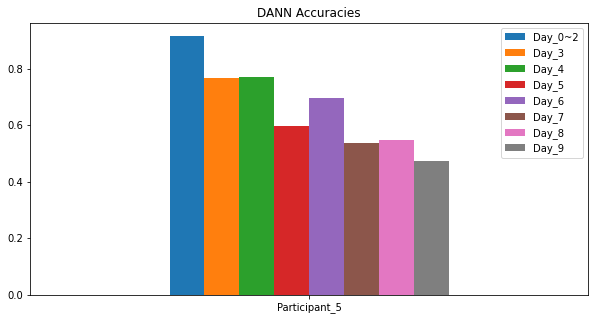

In [19]:
DANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("DANN Accuracies")
plt.show()

In [20]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_DANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 8)
predictions =  (1, 8)
index_participant_list  ['0~2', 3, 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 8)


,Unnamed: 0,Loc1_Sub5_Day0~2->0~2,Loc1_Sub5_Day0~2->3,Loc1_Sub5_Day0~2->4,Loc1_Sub5_Day0~2->5,Loc1_Sub5_Day0~2->6,Loc1_Sub5_Day0~2->7,Loc1_Sub5_Day0~2->8,Loc1_Sub5_Day0~2->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,0.807692,0.923077,1.000000,0.846154,0.615385,0.730769,0.730769
2,M2,0.871795,0.538462,0.846154,0.384615,0.500000,0.192308,0.000000,0.346154
3,M3,0.948718,0.423077,0.653846,0.038462,0.000000,0.000000,0.000000,0.000000
4,M4,0.833333,0.000000,0.961538,0.000000,0.000000,0.000000,0.000000,0.000000
5,M5,1.000000,1.000000,0.615385,0.692308,0.923077,0.307692,0.846154,0.576923
6,M6,1.000000,0.423077,0.923077,0.576923,0.461538,0.461538,0.269231,0.692308
7,M7,0.987179,1.000000,1.000000,0.730769,0.923077,0.769231,0.807692,0.730769
8,M8,0.923077,1.000000,0.961538,1.000000,0.807692,1.000000,0.961538,0.615385
9,M9,0.897436,0.769231,0.615385,0.346154,0.730769,0.038462,0.576923,0.192308


# 3. SCADANN

* `run_SCADANN_training_sessions`: train SCADANN model. The first session uses TSD model_0 wegits; others use DANN weights
    * specify `percentage_same_gesture_stable` based on the performance of most pseudo labels: 
        * print accuracies out and check what percentage will optimize `ACCURACY MODEL` and `ACCURACY PSEUDO` without cutting out too much data 
    * num_sessions-1 sets of training weights will be saved


In [21]:
from TrainingsAndEvaluations.ForTrainingSessions.train_tsd_dnn_SCADANN import \
    run_SCADANN_training_sessions, test_network_SCADANN

In [22]:
# percentage_same_gesture_stable = 0.75 
# run_SCADANN_training_sessions(examples_datasets=examples_datasets_train, labels_datasets=labels_datasets_train,
#                               num_kernels=num_kernels, feature_vector_input_length=feature_vector_input_length,
#                               path_weights_to_save_to=path_SCADANN,
#                               path_weights_Adversarial_training=path_DANN,
#                               path_weights_Normal_training=path_TSD,
#                               number_of_cycles_total = number_of_cycles_total, 
#                               number_of_cycle_for_first_training = number_of_cycle_for_first_training,
#                               number_of_classes=number_of_classes,
#                               learning_rate=learning_rate)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (0,)    (0,)
       one group XY train (6864, 252)    (6864,)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training_index_examples  (4, 572, 252)  at  4
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (0,)    (0,)
       one group XY train (2288, 252)    (2288,)
   GET one training

/home/laiy/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/laiy/.local/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Accuracy total 0.875977, main loss classifier 0.497155, source accuracy 0.916667 source classification loss 0.241856, target accuracy 0.835286 target loss 0.525237 accuracy domain distinction 0.500000 loss domain distinction 1.136086,
VALIDATION Loss: 0.28911076 Acc: 0.91478697
New best validation loss:  0.28911075794271063
Epoch 2 of 500 took 0.329s
Accuracy total 0.884115, main loss classifier 0.440483, source accuracy 0.914062 source classification loss 0.249852, target accuracy 0.854167 target loss 0.417600 accuracy domain distinction 0.500000 loss domain distinction 1.067576,
VALIDATION Loss: 0.33220528 Acc: 0.90977444
Epoch 3 of 500 took 0.314s
Accuracy total 0.888021, main loss classifier 0.425458, source accuracy 0.903646 source classification loss 0.266874, target accuracy 0.872396 target loss 0.375112 accuracy domain distinction 0.500000 loss domain distinction 1.044651,
VALIDATION Loss: 0.32067026 Acc: 0.9122807
Epoch 4 of 500 took 0.318s
Accuracy total 0.890951, main loss c

Accuracy total 0.916016, main loss classifier 0.357803, source accuracy 0.911458 source classification loss 0.273458, target accuracy 0.920573 target loss 0.235845 accuracy domain distinction 0.500000 loss domain distinction 1.031521,
VALIDATION Loss: 0.24165157 Acc: 0.90977444
Epoch 28 of 500 took 0.404s
Accuracy total 0.912435, main loss classifier 0.370423, source accuracy 0.911458 source classification loss 0.254882, target accuracy 0.913411 target loss 0.279962 accuracy domain distinction 0.500000 loss domain distinction 1.030018,
VALIDATION Loss: 0.19044457 Acc: 0.92982456
New best validation loss:  0.1904445689703737
Epoch 29 of 500 took 0.318s
Accuracy total 0.909831, main loss classifier 0.368859, source accuracy 0.907552 source classification loss 0.265976, target accuracy 0.912109 target loss 0.265179 accuracy domain distinction 0.500000 loss domain distinction 1.032817,
VALIDATION Loss: 0.22388798 Acc: 0.9122807
Epoch 30 of 500 took 0.317s
Accuracy total 0.902344, main loss

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

Accuracy total 0.872070, main loss classifier 0.486121, source accuracy 0.886068 source classification loss 0.346757, target accuracy 0.858073 target loss 0.417656 accuracy domain distinction 0.500000 loss domain distinction 1.039139,
VALIDATION Loss: 0.21594267 Acc: 0.95
Epoch 7 of 500 took 0.353s
Accuracy total 0.881836, main loss classifier 0.448027, source accuracy 0.885417 source classification loss 0.311780, target accuracy 0.878255 target loss 0.377031 accuracy domain distinction 0.500000 loss domain distinction 1.036210,
VALIDATION Loss: 0.20218140 Acc: 0.9425
Epoch 8 of 500 took 0.321s
Accuracy total 0.885417, main loss classifier 0.445777, source accuracy 0.880859 source classification loss 0.330696, target accuracy 0.889974 target loss 0.353015 accuracy domain distinction 0.500000 loss domain distinction 1.039217,
VALIDATION Loss: 0.21203234 Acc: 0.9425
Epoch 9 of 500 took 0.314s
Accuracy total 0.885742, main loss classifier 0.449204, source accuracy 0.890625 source classifi

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  1.0  len before:  26   len after:  18
BEFORE:  0.5769230769230769   AFTER:  0.5555555555555556  len before:  26   len after:  18
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  6
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  7
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:

Accuracy total 0.880208, main loss classifier 0.437932, source accuracy 0.878906 source classification loss 0.335210, target accuracy 0.881510 target loss 0.331918 accuracy domain distinction 0.500000 loss domain distinction 1.043676,
VALIDATION Loss: 0.24720393 Acc: 0.88832487
Epoch 18 of 500 took 0.319s
Accuracy total 0.891602, main loss classifier 0.418097, source accuracy 0.889323 source classification loss 0.333491, target accuracy 0.893880 target loss 0.294271 accuracy domain distinction 0.500000 loss domain distinction 1.042155,
VALIDATION Loss: 0.20563929 Acc: 0.92893401
Epoch    18: reducing learning rate of group 0 to 1.0060e-04.
Epoch 19 of 500 took 0.315s
Accuracy total 0.882812, main loss classifier 0.434845, source accuracy 0.882812 source classification loss 0.336965, target accuracy 0.882812 target loss 0.326439 accuracy domain distinction 0.500000 loss domain distinction 1.031428,
VALIDATION Loss: 0.15913741 Acc: 0.94162437
New best validation loss:  0.1591374129056930

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.11538461538461539   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.3076923076923077   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  1.0  len before:  26   len after:  7
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  0.8076923076923077  len before: 

BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  16
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  18
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.46153846153846156   AFTER:  1.0  len before:  26   len after:  4
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  14
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.4230769230769231   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:

Accuracy total 0.880000, main loss classifier 0.459466, source accuracy 0.875000 source classification loss 0.361882, target accuracy 0.885000 target loss 0.350423 accuracy domain distinction 0.500000 loss domain distinction 1.033133,
VALIDATION Loss: 0.20745029 Acc: 0.94160584
Epoch 23 of 500 took 0.329s
Accuracy total 0.887500, main loss classifier 0.437701, source accuracy 0.894375 source classification loss 0.326355, target accuracy 0.880625 target loss 0.343219 accuracy domain distinction 0.500000 loss domain distinction 1.029146,
VALIDATION Loss: 0.16463831 Acc: 0.95377129
Epoch 24 of 500 took 0.341s
Training complete in 0m 8s
['participant_0']
Optimizer =  <generator object Module.parameters at 0x7facc55f49e0>
=> loading checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/TrainingsAndEvaluations/ForTrainingSessions/Weights_across_day_loc_1_lump3/DANN/participant_0/best_state_5.pt'
Loading Optimizer
=> loaded checkpoint '/home/laiy/gitrepos/msr_final/LongTermEMG_myo/Trainin

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after:  7
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7692307692307693  len before:  26   len after:  26
BEFORE:  0.6153846153846154   AFTER:  1.0  len before:  26   len after:  6
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26

BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  9
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  5
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.3076923076923077   AFTER:  1.0  len before:  26   len after:  1
BEFORE:  0.5769230769230769   AFTER:  1.0  len before:  26   len after:  10
BEFORE:  0.38461538461538464   AFTER:  0.6470588235294118  len before:  26   len after:  17
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  5
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  1.0  len before:  26   len after:  8
BEFORE:  0.1923076923076923

Accuracy total 0.892857, main loss classifier 0.428776, source accuracy 0.873512 source classification loss 0.366935, target accuracy 0.912202 target loss 0.282822 accuracy domain distinction 0.500000 loss domain distinction 1.038974,
VALIDATION Loss: 0.23578949 Acc: 0.90828402
Epoch    18: reducing learning rate of group 0 to 1.0060e-04.
Epoch 19 of 500 took 0.280s
Accuracy total 0.885417, main loss classifier 0.436927, source accuracy 0.875000 source classification loss 0.367725, target accuracy 0.895833 target loss 0.300887 accuracy domain distinction 0.500000 loss domain distinction 1.026209,
VALIDATION Loss: 0.18509543 Acc: 0.92307692
Epoch 20 of 500 took 0.281s
Accuracy total 0.885789, main loss classifier 0.437997, source accuracy 0.872768 source classification loss 0.360027, target accuracy 0.898810 target loss 0.309332 accuracy domain distinction 0.500000 loss domain distinction 1.033177,
VALIDATION Loss: 0.18138962 Acc: 0.92307692
New best validation loss:  0.1813896236320336

Accuracy total 0.901786, main loss classifier 0.398286, source accuracy 0.890625 source classification loss 0.322654, target accuracy 0.912946 target loss 0.268175 accuracy domain distinction 0.500000 loss domain distinction 1.028713,
VALIDATION Loss: 0.23882873 Acc: 0.89349112
Epoch 45 of 500 took 0.282s
Accuracy total 0.905134, main loss classifier 0.402548, source accuracy 0.897321 source classification loss 0.312352, target accuracy 0.912946 target loss 0.288236 accuracy domain distinction 0.500000 loss domain distinction 1.022539,
VALIDATION Loss: 0.16390830 Acc: 0.93491124
Epoch    45: reducing learning rate of group 0 to 8.0480e-07.
Epoch 46 of 500 took 0.280s
Accuracy total 0.897321, main loss classifier 0.411888, source accuracy 0.884673 source classification loss 0.360859, target accuracy 0.909970 target loss 0.258150 accuracy domain distinction 0.500000 loss domain distinction 1.023836,
VALIDATION Loss: 0.16870676 Acc: 0.93195266
Epoch 47 of 500 took 0.280s
Accuracy total 0.

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  9
BEFORE:  0.19230769230769232   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.11538461538461539   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.3076923076923077   AFTER:  0.38461538461538464  len before:  26   len after:  26
BEFORE:  0.07692307692307693   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  1.0  len before:  26   len after:  7
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.9615384615384616   AFTER:  1.

Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.5769230769230769  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  11
BEFORE:  0.5   AFTER:  0.46153846153846156  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  7
BEFORE:  0.6153846153846154   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  9
BEFORE:  0.34615384615384615   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.3076923076923077   AFTER:  0.6  len before:  26   len after:  10
BEFORE:  0.5769230769230769   AFTER:  1.0  len before:  26   len after:  12
BEFORE:  0.84615384615

STARTING TRAINING
Accuracy total 0.761009, main loss classifier 0.875407, source accuracy 0.762074 source classification loss 0.759696, target accuracy 0.759943 target loss 0.762534 accuracy domain distinction 0.499645 loss domain distinction 1.142921,
VALIDATION Loss: 0.38915802 Acc: 0.83888889
New best validation loss:  0.3891580179333687
Epoch 2 of 500 took 0.322s
Accuracy total 0.797940, main loss classifier 0.710247, source accuracy 0.812500 source classification loss 0.583133, target accuracy 0.783381 target loss 0.613677 accuracy domain distinction 0.500000 loss domain distinction 1.118423,
VALIDATION Loss: 0.25361298 Acc: 0.93333333
New best validation loss:  0.2536129802465439
Epoch 3 of 500 took 0.300s
Accuracy total 0.804688, main loss classifier 0.685816, source accuracy 0.804688 source classification loss 0.586041, target accuracy 0.804688 target loss 0.564074 accuracy domain distinction 0.499645 loss domain distinction 1.107578,
VALIDATION Loss: 0.27979566 Acc: 0.89166667

Accuracy total 0.889205, main loss classifier 0.438455, source accuracy 0.870028 source classification loss 0.399571, target accuracy 0.908381 target loss 0.269919 accuracy domain distinction 0.500000 loss domain distinction 1.037102,
VALIDATION Loss: 0.12169811 Acc: 0.95555556
New best validation loss:  0.1216981088121732
Epoch 28 of 500 took 0.296s
Accuracy total 0.887784, main loss classifier 0.429647, source accuracy 0.858665 source classification loss 0.394565, target accuracy 0.916903 target loss 0.257430 accuracy domain distinction 0.500000 loss domain distinction 1.036495,
VALIDATION Loss: 0.17878845 Acc: 0.93055556
Epoch 29 of 500 took 0.293s
Accuracy total 0.886364, main loss classifier 0.430028, source accuracy 0.865057 source classification loss 0.377443, target accuracy 0.907670 target loss 0.275423 accuracy domain distinction 0.500000 loss domain distinction 1.035956,
VALIDATION Loss: 0.16878742 Acc: 0.94722222
Epoch 30 of 500 took 0.295s
Accuracy total 0.886009, main los

Finish segment dataset
Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  0.7307692307692307  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5769230769230769   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  17
BEFORE:  0.6923076923076923   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.6538461538461539  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846  

BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  7
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  16
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.5384615384615384   AFTER:  0.625  len before:  26   len after:  16
BEFORE:  0.9615384615384616   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.38461538461538464   AFTER:  0.46153846153846156  len before:  26   len after:  26
BEFORE:  0.038461538461538464   AFTER:  0.0  len before:  26   len after:  6
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.6923076923076923   AFTER:  0.9  len before:  26   len 

Finish pseudo_labels
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  0.5769230769230769  len before:  26   len after:  26
BEFORE:  0.5   AFTER:  0.5  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  11
BEFORE:  0.5   AFTER:  0.46153846153846156  len before:  26   len after:  26
BEFORE:  0.6538461538461539   AFTER:  1.0  len before:  26   len after:  7
BEFORE:  0.6153846153846154   AFTER:  0.6153846153846154  len before:  26   len after:  26
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.2692307692307692   AFTER:  0.0  len before:  26   len after:  9
BEFORE:  0.34615384615384615   AFTER:  nan  len before:  26   len after:  0
BEFORE:  0.3076923076923077   AFTER:  0.6  len before:  26   len after:  10
BEFORE:  0.5769230769230769   AFTER:  1.0  len before:  26   len after:  12
BEFORE:  0.84615384615

BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  17
BEFORE:  0.11538461538461539   AFTER:  0.0  len before:  26   len after:  18
BEFORE:  0.8461538461538461   AFTER:  1.0  len before:  26   len after:  18
BEFORE:  0.9230769230769231   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.23076923076923078   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.8076923076923077   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7692307692307693   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.8846153846153846   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  1.0   AFTER:  1.0  len before:  26   len after:  26
BEFORE:  0.7307692307692307   AFTER:  1.0  len before:  26   len after:  10
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  0.0   AFTER:  0.0  len before:  26   len after:  26
BEFORE:  

Accuracy total 0.740829, main loss classifier 0.981251, source accuracy 0.803668 source classification loss 0.580117, target accuracy 0.677989 target loss 1.154726 accuracy domain distinction 0.500000 loss domain distinction 1.138293,
VALIDATION Loss: 0.52906536 Acc: 0.84281843
New best validation loss:  0.5290653556585312
Epoch 2 of 500 took 0.328s
Accuracy total 0.769701, main loss classifier 0.833193, source accuracy 0.828804 source classification loss 0.515397, target accuracy 0.710598 target loss 0.938145 accuracy domain distinction 0.500000 loss domain distinction 1.064223,
VALIDATION Loss: 0.36047622 Acc: 0.88888889
New best validation loss:  0.36047621568044025
Epoch 3 of 500 took 0.308s
Accuracy total 0.783628, main loss classifier 0.815982, source accuracy 0.832880 source classification loss 0.527751, target accuracy 0.734375 target loss 0.895152 accuracy domain distinction 0.500000 loss domain distinction 1.045300,
VALIDATION Loss: 0.47428527 Acc: 0.82926829
Epoch 4 of 500 t

Accuracy total 0.834239, main loss classifier 0.588783, source accuracy 0.853261 source classification loss 0.418302, target accuracy 0.815217 target loss 0.553147 accuracy domain distinction 0.500000 loss domain distinction 1.030584,
VALIDATION Loss: 0.32314016 Acc: 0.90785908
Epoch 28 of 500 took 0.310s
Accuracy total 0.835598, main loss classifier 0.599527, source accuracy 0.854620 source classification loss 0.437885, target accuracy 0.816576 target loss 0.554047 accuracy domain distinction 0.500000 loss domain distinction 1.035615,
VALIDATION Loss: 0.30938488 Acc: 0.89430894
Epoch 29 of 500 took 0.307s
Accuracy total 0.832201, main loss classifier 0.604691, source accuracy 0.851902 source classification loss 0.427771, target accuracy 0.812500 target loss 0.573536 accuracy domain distinction 0.500000 loss domain distinction 1.040372,
VALIDATION Loss: 0.38662131 Acc: 0.85907859
Epoch 30 of 500 took 0.305s
Accuracy total 0.831522, main loss classifier 0.633480, source accuracy 0.84578

In [23]:
algo_name = "SCADANN"
test_network_SCADANN(examples_datasets_train=examples_datasets_train, labels_datasets_train=labels_datasets_train,
                     num_neurons=num_kernels, feature_vector_input_length=feature_vector_input_length,
                     path_weights_SCADANN =path_SCADANN, path_weights_normal=path_TSD,
                     algo_name=algo_name, cycle_test=3, number_of_cycles_total=number_of_cycles_total,
                     number_of_cycle_for_first_training = number_of_cycle_for_first_training,
                     number_of_classes=number_of_classes, save_path = save_SCADANN)

GET one participant_examples  (8,)
   GET one training_index_examples  (12, 572, 252)  at  0
   GOT one group XY  (6864, 252)    (6864,)
       one group XY test  (1716, 252)    (1716, 252)
       one group XY train (6177, 252)    (6177,)
       one group XY valid (687, 252)    (687, 252)
   GET one training_index_examples  (4, 572, 252)  at  1
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  2
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
       one group XY valid (229, 252)    (229, 252)
   GET one training_index_examples  (4, 572, 252)  at  3
   GOT one group XY  (2288, 252)    (2288,)
       one group XY test  (572, 252)    (572, 252)
       one group XY train (2059, 252)    (2059,)
     

In [24]:
results_filename = save_SCADANN + '/predictions_' + algo_name + ".npy"
results = np.load(results_filename, allow_pickle=True)
SCADANN_acc = results[0]
SCADANN_acc_overall = np.mean(SCADANN_acc)
SCADANN_df = pd.DataFrame(SCADANN_acc.transpose(), 
                       index = [f'Day_{i}' for i in index_participant_list],
                        columns = ['Participant_5'])
SCADANN_df

,Participant_5
Day_0~2,0.916084
Day_3,0.814685
Day_4,0.81993
Day_5,0.653846
Day_6,0.762238
Day_7,0.652098
Day_8,0.606643
Day_9,0.527972


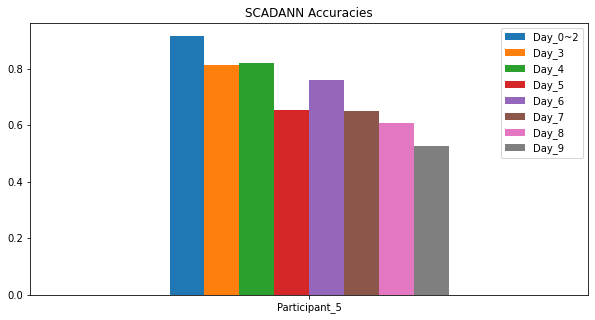

In [25]:
SCADANN_df.transpose().plot.bar(rot=0, figsize=(10,5))
plt.title("SCADANN Accuracies")
plt.show()

In [26]:
ground_truths = results[1]
predictions = results[2]
print("ground_truths  = ", np.shape(ground_truths))
print("predictions = ", np.shape(predictions))
df = get_gesture_accuracies(ground_truths, predictions, number_of_classes=number_of_classes, 
                            m_name=m_name, n_name=n_name, path=save_TSD, algo_name=algo_name,
                           index_participant_list_customized=index_participant_list,
                           lump_day_at_participant=5)
df = pd.read_csv(save_SCADANN+'/'+algo_name+'.csv')
df

ground_truths  =  (1, 8)
predictions =  (1, 8)
index_participant_list  ['0~2', 3, 4, 5, 6, 7, 8, 9]
accuracies_gestures =  (22, 8)


,Unnamed: 0,Loc1_Sub5_Day0~2->0~2,Loc1_Sub5_Day0~2->3,Loc1_Sub5_Day0~2->4,Loc1_Sub5_Day0~2->5,Loc1_Sub5_Day0~2->6,Loc1_Sub5_Day0~2->7,Loc1_Sub5_Day0~2->8,Loc1_Sub5_Day0~2->9
0,M0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,M1,0.961538,0.884615,0.923077,1.000000,0.884615,0.807692,0.730769,0.730769
2,M2,0.871795,0.615385,0.846154,0.230769,0.500000,0.307692,0.038462,0.230769
3,M3,0.948718,0.576923,0.730769,0.038462,0.000000,0.000000,0.000000,0.000000
4,M4,0.833333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,M5,1.000000,1.000000,0.576923,0.730769,1.000000,0.461538,0.961538,0.538462
6,M6,1.000000,0.846154,1.000000,0.423077,0.692308,0.576923,0.461538,1.000000
7,M7,0.987179,1.000000,1.000000,0.961538,1.000000,0.961538,1.000000,0.807692
8,M8,0.923077,1.000000,1.000000,1.000000,0.846154,1.000000,1.000000,1.000000
9,M9,0.897436,0.730769,0.730769,0.423077,0.769231,0.038462,0.615385,0.192308


# Conclusion
Suppose there is a ndarray of NxM dataloaders, then N group of models will be trained, and each group will have M model. Each group is independent of the other, and each model within a group is dependent on its previous training weights.

In general, overall accuracies of SCADANN are better than DANN, and DANN is better than TSD.
Occasionally accuracies of SCADANN end up a little smaller than DANN, reasons may be lack of datasets put into training model (fixed) and non-optimal percentage_same_gesture_sable (fixed). Code should be reproducible if processed dataset sticks to the shape defined above.  

The amount of increase in accuracies from DANN to SCADANN looks random. But if the base model is better at classifying one session, then its corresponding SCADANN is also better at classifying the same session. Given such result, to obtain the best performance from SCADANN, a good model trained with good data should be the starting point.

* What to check if sth goes wrong:
    * percentage_same_gesture_sable
    * number of cycles or sessions
    * shape of dataloaders (combination of train, test, valid should include all dataset)
    * shape of procssed datasets
    * directory paths of weights and results
    * if weights are stored or loaded correcltyTSD_acc_overall_one = np.mean(TSD_acc, axis=0)

In [27]:
print("TSD")
display(TSD_df)
print("DANN")
display(DANN_df)
print("SCADANN")
display(SCADANN_df)

TSD


,Participant_5
Day_0~2,0.916084
Day_3,0.690559
Day_4,0.716783
Day_5,0.568182
Day_6,0.618881
Day_7,0.444056
Day_8,0.458042
Day_9,0.41958


DANN


,Participant_5
Day_0~2,0.916084
Day_3,0.767483
Day_4,0.772727
Day_5,0.596154
Day_6,0.695804
Day_7,0.536713
Day_8,0.548951
Day_9,0.475524


SCADANN


,Participant_5
Day_0~2,0.916084
Day_3,0.814685
Day_4,0.81993
Day_5,0.653846
Day_6,0.762238
Day_7,0.652098
Day_8,0.606643
Day_9,0.527972


In [28]:
diff_df = SCADANN_df-TSD_df
diff_df = diff_df.drop('Day_'+index_participant_list[0])
display(diff_df)
diff_df.to_csv(save_TSD+'/diff_results/across_day_loc1_lump3_diff.csv')

,Participant_5
Day_3,0.124126
Day_4,0.103147
Day_5,0.085664
Day_6,0.143357
Day_7,0.208042
Day_8,0.148601
Day_9,0.108392


In [29]:
overall_acc_df = pd.DataFrame([TSD_acc_overall, DANN_acc_overall, SCADANN_acc_overall],
                             index = ["TSD", "DANN", "SCADANN"],
                             columns = ["Overall_Acc"])
overall_acc_df

,Overall_Acc
TSD,0.604021
DANN,0.663680
SCADANN,0.719187


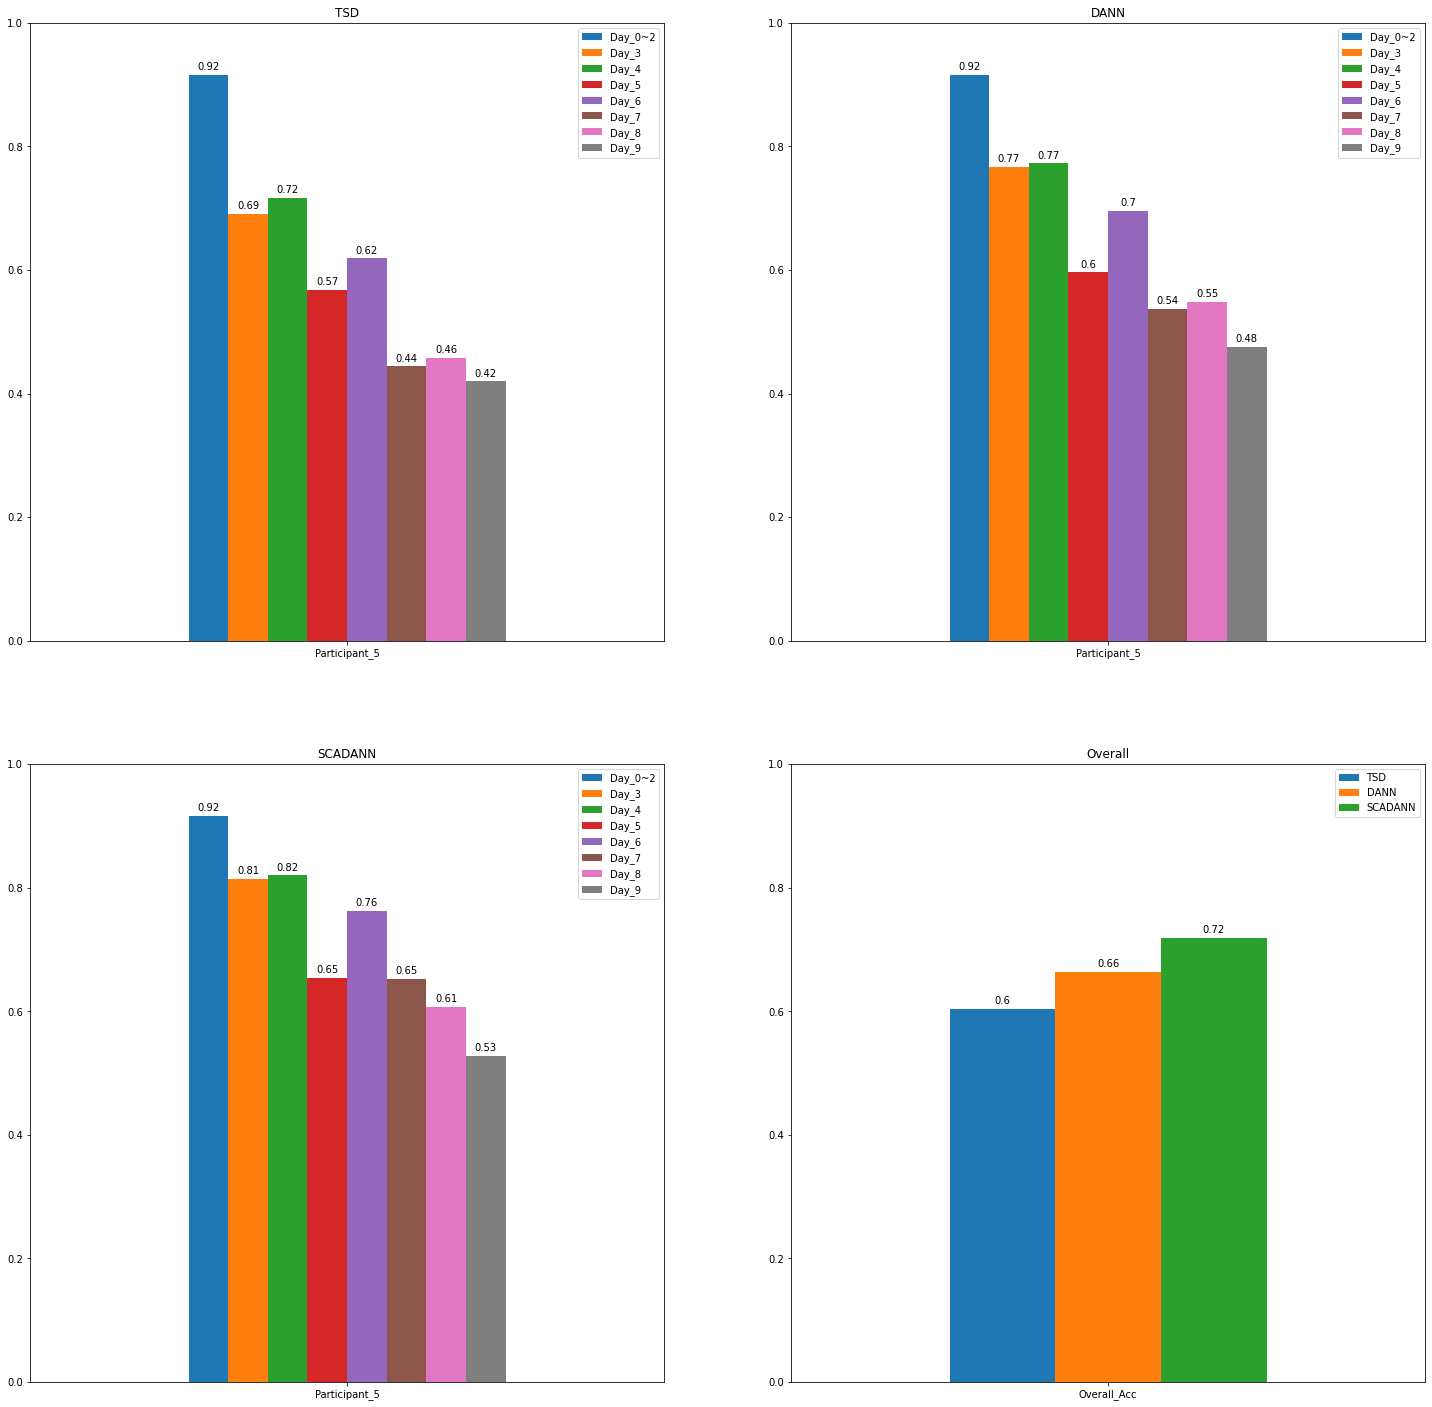

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,25))
acc_list = [TSD_df, DANN_df, SCADANN_df, overall_acc_df]
title_list = ["TSD", "DANN", "SCADANN", "Overall"]
for idx, ax in enumerate(axes.reshape(-1)): 
    acc_list[idx].transpose().plot.bar(ax = ax, rot=0)
    ax.set_title(title_list[idx])
    ax.set_ylim([0, 1.0])
    for p in ax.patches:
        ax.annotate(str(np.round(p.get_height(),2)), (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='center', xytext=(0, 8),textcoords='offset points')
